## 라이브러리 및 데이터 로드

In [62]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt



# (2) 설치된 한글 폰트로 설정
# mat.rcParams['font.family'] = 'Black Han Sans'

sns.set(style='whitegrid')


plt.rcParams['font.family'] = 'NanumGothic'

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [63]:
df = pd.read_excel('./data/청년실업률.xlsx')
df.info
df

C:\Users\park123\anaconda3\envs\aischool_env\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,서울특별시,서울특별시.1,서울특별시.2,서울특별시.3,서울특별시.4,서울특별시.5,서울특별시.6,서울특별시.7,서울특별시.8,...,서울특별시.14,서울특별시.15,서울특별시.16,서울특별시.17,서울특별시.18,서울특별시.19,서울특별시.20,서울특별시.21,서울특별시.22,서울특별시.23
0,시점,인구,인구,인구,소득과 소비,소득과 소비,소득과 소비,소득과 소비,고용과 노동,고용과 노동,...,고용과 노동,고용과 노동,고용과 노동,주거와 교통,성장과 안정,성장과 안정,성장과 안정,성장과 안정,성장과 안정,사회통합
1,시점,순이동인구 (명),전입인구 (명),전출인구 (명),소비자물가지수 (2015=100),예금은행대출금액 (십억원),예금은행예금액 (십억원),소비자물가 등락률 (%),경제활동인구(시도) (천명),경제활동참가율(시도) (%),...,취업자증감 (천명),청년실업률 (%),구직급여 신청자수 (명),지가변동률 (%),제조업생산 증감률 (%),서비스업생산 증감률 (%),백화점판매액 (백만원),대형소매점판매액 (백만원),광공업생산지수 (2015=100),요양기관수 (개소)
2,2000 1/4,1530.0,564339.0,562809.0,64.98,122995.0,182568.0,2.3,4884.0,61.1,...,-,10.4,-,0.46,-,-,-,-,99.2,-
3,2000 2/4,-13175.0,589240.0,602415.0,64.93,134786.0,199346.0,2.1,4897.0,61.1,...,-,7.2,-,0.39,-,-,-,-,98.3,-
4,2000 3/4,-4165.0,492407.0,496572.0,65.72,145208.0,200237.0,3.2,4940.0,61.6,...,190.6,7.2,-,0.29,-,-,-,-,100.5,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2016 4/4,-43266.0,395886.0,439152.0,101.83,544592.0,628071.0,1.5,5385.0,62.8,...,11.6,9.0,44410.0,-,-2.8,2.6,3594281.0,5278625.0,113.8,21786.0
70,2017 1/4,-8765.0,419262.0,428027.0,102.95,545106.0,620436.0,2.1,5368.0,62.7,...,8.4,11.0,59403.0,-,0.0,2.7,2947942.0,4631021.0,110.4,21821.0
71,2017 2/4,-19010.0,352300.0,371310.0,103.02,550278.0,631199.0,2.1,5414.0,63.2,...,23.0,10.3,44503.0,-,-2.3,2.0,2898327.0,4572130.0,93.3,21958.0
72,2017 3/4,-30565.0,366290.0,396855.0,103.65,563860.0,644338.0,2.4,5432.0,63.5,...,26.9,9.8,44530.0,-,4.8,3.2,2851387.0,4691097.0,100.0,21998.0


In [64]:
df.columns = df.loc[df.index[1], :]
df = df.drop(index=[0, 1]).reset_index()

In [65]:
unemployment = df[['청년실업률 (%)']].astype('float32')
unemployment.index = df['시점']
unemployment.reset_index()

1,시점,청년실업률 (%)
0,2000 1/4,10.4
1,2000 2/4,7.2
2,2000 3/4,7.2
3,2000 4/4,7.5
4,2001 1/4,10.5
...,...,...
67,2016 4/4,9.0
68,2017 1/4,11.0
69,2017 2/4,10.3
70,2017 3/4,9.8


## 단순지수평활

In [66]:
import numpy as np

In [83]:
model = SimpleExpSmoothing(np.asarray(unemployment['청년실업률 (%)']))
# model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=0.1)
fit2 = model.fit(smoothing_level=0.3)


C:\Users\park123\anaconda3\envs\aischool_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [84]:
unemployment['ep.1'] = fit1.fittedvalues
unemployment['ep.3'] = fit2.fittedvalues


unemployment

1,청년실업률 (%),ep.1,ep.3
시점,,,
2000 1/4,10.4,8.419067,8.564729
2000 2/4,7.2,8.617160,9.115311
2000 3/4,7.2,8.475444,8.540718
2000 4/4,7.5,8.347900,8.138502
2001 1/4,10.5,8.263110,7.946952
...,...,...,...
2016 4/4,9.0,9.505823,9.975266
2017 1/4,11.0,9.455241,9.682686
2017 2/4,10.3,9.609717,10.077881


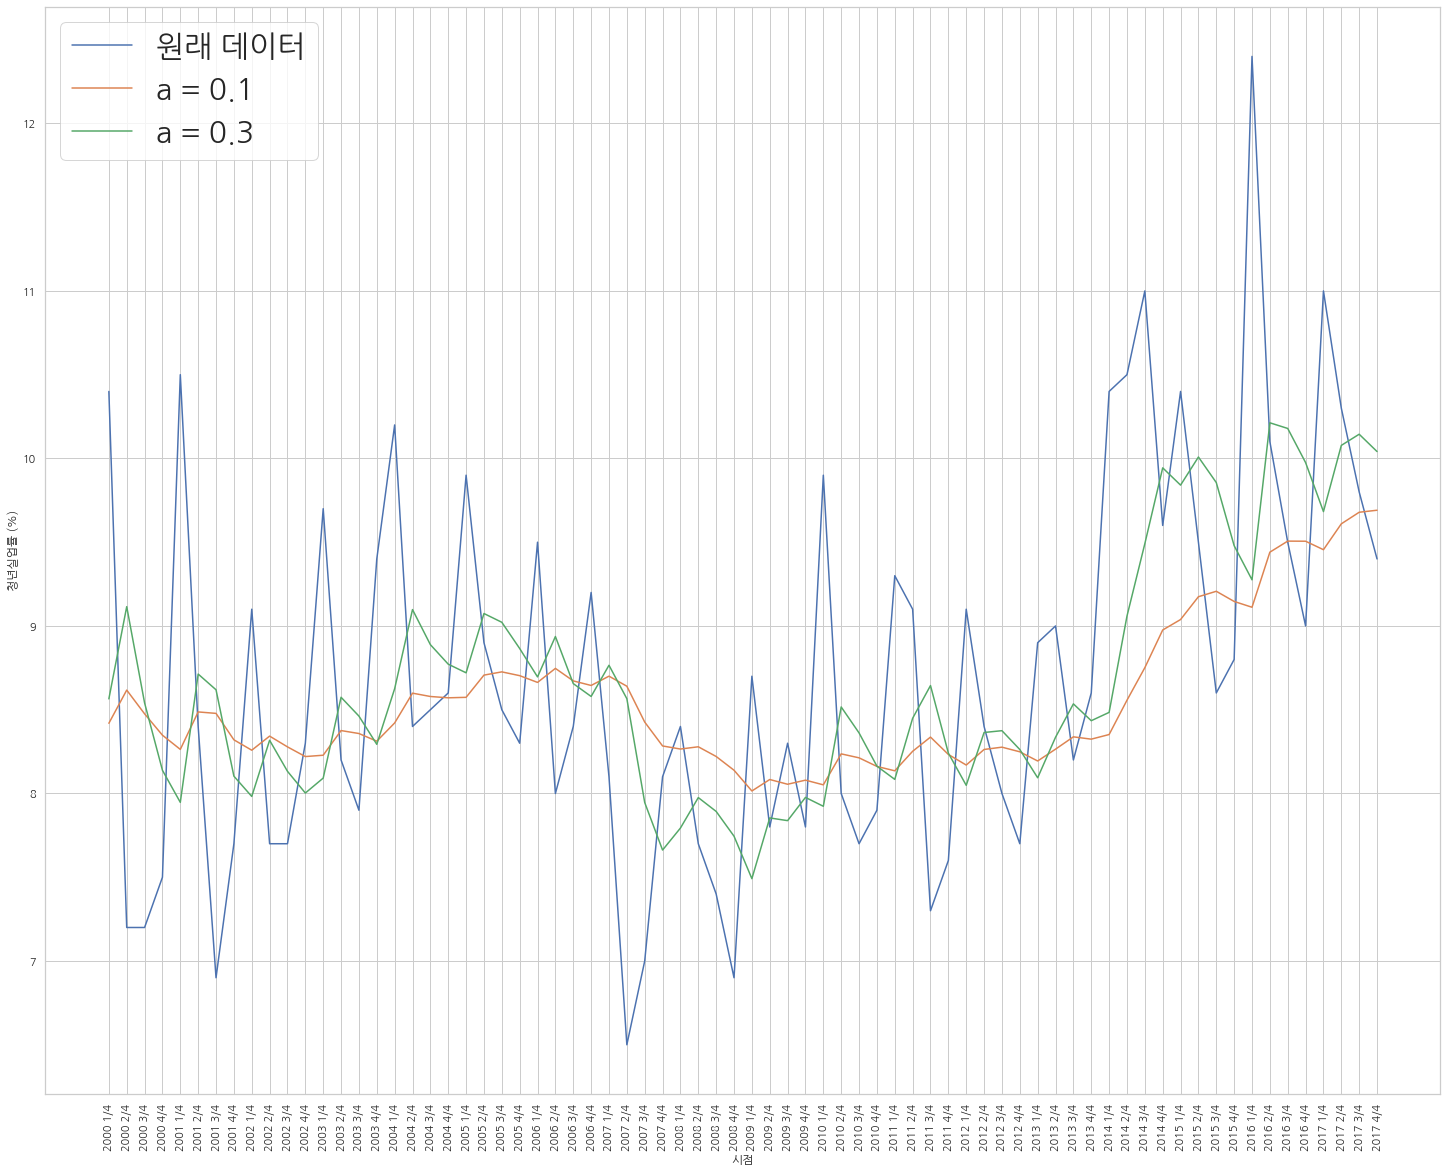

In [86]:
# a가 작을수록 평활효과가 더 크고, 클수록 최근 값을 더 많이 반영한다

fig, ax = plt.subplots(figsize=(25, 20))
sns.lineplot(data=unemployment, x='시점', y='청년실업률 (%)', legend=True)
sns.lineplot(data=unemployment, x='시점', y='ep.1', legend=True)
sns.lineplot(data=unemployment, x='시점', y='ep.3', palette='Reds_r')

plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.legend(labels=["원래 데이터","a = 0.1", "a = 0.3"], fontsize=30)
plt.show()

## 홀트 모형
- 시계열 데이터가 추세 패턴이 있는 경우, 수평 수준과 추세 각각 갱신

In [89]:
df = pd.read_excel('./data/특허건수.xlsx')

new_df = pd.DataFrame()
new_df['특허건수'] = df.iloc[4:5, 2:].unstack()
# new_df['연도'] = df.iloc[4:5, 2:].columns
new_df = new_df.reset_index()[['level_0', '특허건수']]
new_df['특허건수'] = new_df['특허건수'].replace(to_replace=',', value='', regex=True).astype(int) / 1000

new_df

,level_0,특허건수
0,1993,16.395
1,1994,16.047
2,1995,20.060
3,1996,23.011
4,1997,36.246
5,1998,86.364
6,1999,86.978
7,2000,68.338
8,2001,55.766
9,2002,79.414


In [97]:
model1 = SimpleExpSmoothing(np.asarray(new_df['특허건수'])).fit(smoothing_level=0.2)
model2 = Holt(np.asarray(new_df['특허건수']), initialization_method = 'estimated').fit(smoothing_level=0.2, smoothing_trend=0.2)
model1.summary()


Dep. Variable:,endog,No. Observations:,24
Model:,SimpleExpSmoothing,SSE,36986.216
Optimized:,True,AIC,180.166
Trend:,None,BIC,182.522
Seasonal:,None,AICC,182.271
Seasonal Periods:,None,Date:,"Mon, 18 Oct 2021"
Box-Cox:,False,Time:,20:40:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
initial_level,44.387287,l.0,True


In [98]:
model2.summary()

Dep. Variable:,endog,No. Observations:,24
Model:,Holt,SSE,18424.987
Optimized:,True,AIC,167.442
Trend:,Additive,BIC,172.154
Seasonal:,None,AICC,172.383
Seasonal Periods:,None,Date:,"Mon, 18 Oct 2021"
Box-Cox:,False,Time:,20:40:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.2000000,beta,False


In [100]:
new_df['holt'] = model2.fittedvalues
new_df['SES'] = model1.fittedvalues
new_df

,level_0,특허건수,holt,SSE,SES
0,1993,16.395,13.718855,44.387287,44.387287
1,1994,16.047,23.429592,38.788830,38.788830
2,1995,20.060,30.833278,34.240464,34.240464
3,1996,23.011,37.127895,31.404371,31.404371
4,1997,36.246,42.189113,29.725697,29.725697
5,1998,86.364,48.647363,31.029758,31.029758
6,1999,86.978,65.346229,42.096606,42.096606
7,2000,68.338,79.693392,51.072885,51.072885
8,2001,55.766,86.988907,54.525908,54.525908
9,2002,79.414,89.062002,54.773926,54.773926


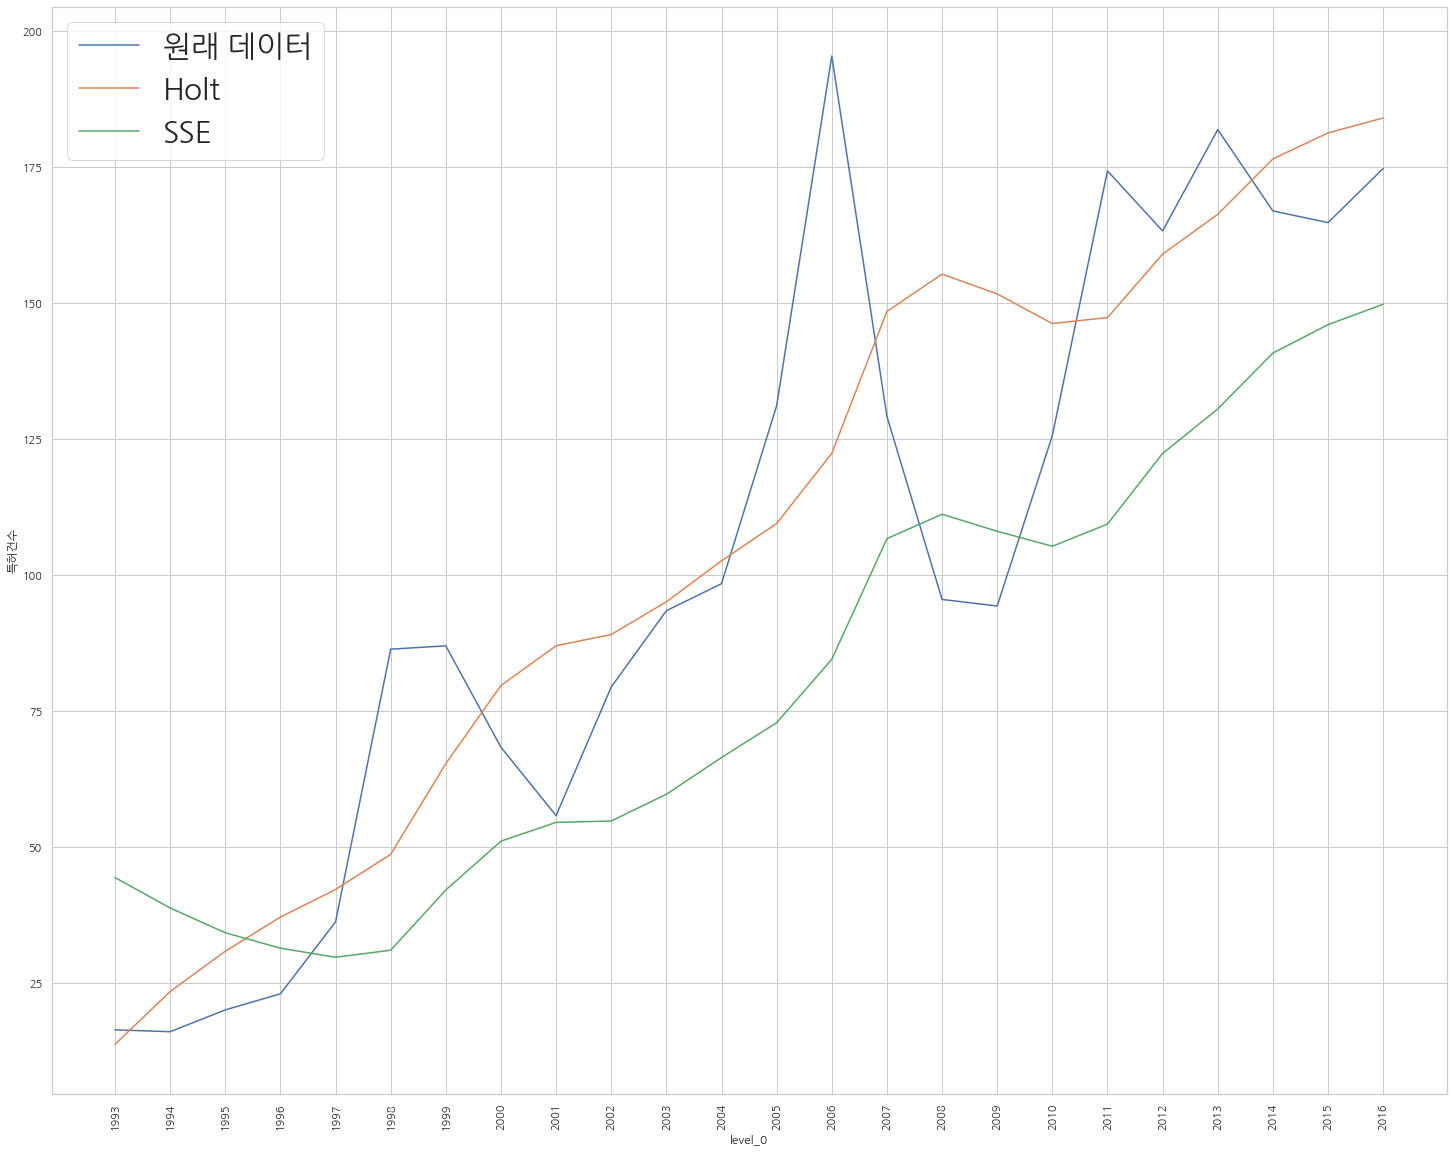

In [102]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.lineplot(data=new_df, x='level_0', y='특허건수')
sns.lineplot(data=new_df, x='level_0', y='holt')
sns.lineplot(data=new_df, x='level_0', y='SES')

# sns.lineplot(data=new_df, x='level_0', y='DMA4')



plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.legend(labels=["원래 데이터","Holt", "SSE"], fontsize=30)
plt.show()

In [105]:
#col1 = 실제, col2 = pred
def error_cal(df, col1, col2):
    # nan 없는 행만 계산하기 위함
    index = (df[col1].isna() | df[col2].isna()) == False
    tmp = df.loc[index, :]
    y, y0 = tmp[col1], tmp[col2]
    error = y - y0

    #MSE
    MSE = np.mean(np.square(error).mean())

    #RMSE
    RMSE = np.sqrt(MSE)
    
    #MAD
    MAD = np.mean(np.abs(error))
    
    #MAPE
    MAPE = np.mean(np.abs((error) / y0)) * 100
    
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')    
    print(f'MAD : {MAD}')
    print(f'MAPE : {MAPE}')

In [108]:
error_cal(new_df, '특허건수', 'holt')


MSE : 767.7078055509128
RMSE : 27.707540590079677
MAD : 20.508521601746256
MAPE : 22.845659748646714


In [109]:
error_cal(new_df, '특허건수', 'SES')

MSE : 1541.092335436873
RMSE : 39.256748915783554
MAD : 31.553021132754356
MAPE : 47.54237361077896
